**Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import model_selection, linear_model, metrics

# Part 1: Linear Regression

### Read data

In [55]:
mir_scores = pd.read_csv('https://raw.githubusercontent.com/efosler/cse5522data/master/miRScore-x.csv', index_col=0)
mrna_poor = pd.read_csv('https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-poor-explained.csv', index_col=0)
mrna_well = pd.read_csv('https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-well-explained.csv', index_col=0)
cancer_type = pd.read_csv('https://github.com/efosler/cse5522data/raw/master/cancerType-x-Categorical.csv')

### Run 55 Linear Regressions

###### Store R^2 and RMSE values for each experiment (10 total)

In [56]:
X = mir_scores.to_numpy()
yPoor = mrna_poor.to_numpy().T
yWell = mrna_well.to_numpy().T

poor_r2s = []
poor_rmses = []
well_r2s = []
well_rmses = []

for i in range(10):
    X_train, X_test, yPoor_train, yPoor_test, yWell_train, yWell_test = model_selection.train_test_split(X, yPoor, yWell, train_size=.8)
    
    poor_fit = linear_model.LinearRegression().fit(X_train, yPoor_train)
    well_fit = linear_model.LinearRegression().fit(X_train, yWell_train)
    poor_predictions = poor_fit.predict(X_test)
    well_predictions = well_fit.predict(X_test)
    poor_r2 = metrics.r2_score(yPoor_test, poor_predictions)
    well_r2 = metrics.r2_score(yWell_test, well_predictions)
    poor_rmse = np.sqrt(metrics.mean_squared_error(yPoor_test, poor_predictions))
    well_rmse = np.sqrt(metrics.mean_squared_error(yWell_test, well_predictions))
    poor_r2s.append(poor_r2)
    poor_rmses.append(poor_rmse)
    well_r2s.append(well_r2)
    well_rmses.append(well_rmse)

### Distribution for poorly explained mRNA expressions

In [57]:
poor_r2_mean = np.mean(poor_r2s)
poor_r2_std = np.std(poor_r2s)
poor_rmse_mean = np.mean(poor_rmses)
poor_rmse_std = np.std(poor_rmses)
print(f"r^2 Distribution {poor_r2_mean, poor_r2_std}")
print(f"RMSE Distribution {poor_rmse_mean, poor_rmse_std}")

r^2 Distribution (0.04344588668220558, 0.0059205870226404465)
RMSE Distribution (0.4707236400885608, 0.0075222974034953)


### Distribution for well explained mRNA expressions

In [58]:
well_r2_mean = np.mean(well_r2s)
well_r2_std = np.std(well_r2s)
well_rmse_mean = np.mean(well_rmses)
well_rmse_std = np.std(well_rmses)
print(f"r^2 Distribution {well_r2_mean, well_r2_std}")
print(f"RMSE Distribution {well_rmse_mean, well_rmse_std}")

r^2 Distribution (0.46737566732705804, 0.004685146849950733)
RMSE Distribution (1.0083555243827962, 0.008190312465612911)


### Histograms

(array([2., 0., 1., 1., 2., 1., 1., 0., 1., 1.]),
 array([0.46038635, 0.46194092, 0.46349549, 0.46505006, 0.46660463,
        0.4681592 , 0.46971377, 0.47126834, 0.47282291, 0.47437748,
        0.47593205]),
 <a list of 10 Patch objects>)

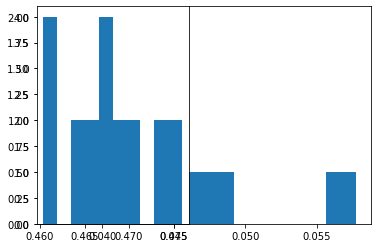

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(121)
ax1.hist(poor_r2s)
ax2.hist(well_r2s)

### Differences between well and poorly expressed gene sets

The poorly expressed gene sets only has an average coefficient of determination of .048, which indicates
little to no correlation between the micro RNA levels and the gene expressions. However, for the well
expressed gene sets, the average coefficient of determination is much higher, at .472, which indicates
some form of linear relationship between the micro RNA levels and the gene expressions.

### Add tissue type to samples (categorical)

In [60]:
all_types = np.array(cancer_type['cancerType'])
unique_types = np.unique(all_types)[:-1]

X_wc = np.zeros((X.shape[0], X.shape[1] + unique_types.shape[0]))

for idx, this_type in enumerate(cancer_type.to_numpy()):
    categorical_columns = unique_types == this_type[1]
    X_wc[idx] = np.append(X[idx], categorical_columns.astype(int))

### Rerun regressions with categorical data

In [61]:
poor_r2s = []
poor_rmses = []
well_r2s = []
well_rmses = []

for i in range(10):
    X_train, X_test, yPoor_train, yPoor_test, yWell_train, yWell_test = model_selection.train_test_split(X, yPoor, yWell, train_size=.8)
    
    poor_fit = linear_model.LinearRegression().fit(X_train, yPoor_train)
    well_fit = linear_model.LinearRegression().fit(X_train, yWell_train)
    poor_predictions = poor_fit.predict(X_test)
    well_predictions = well_fit.predict(X_test)
    poor_r2 = metrics.r2_score(yPoor_test, poor_predictions)
    well_r2 = metrics.r2_score(yWell_test, well_predictions)
    poor_rmse = np.sqrt(metrics.mean_squared_error(yPoor_test, poor_predictions))
    well_rmse = np.sqrt(metrics.mean_squared_error(yWell_test, well_predictions))
    poor_r2s.append(poor_r2)
    poor_rmses.append(poor_rmse)
    well_r2s.append(well_r2)
    well_rmses.append(well_rmse)

### Distribution for poorly explained mRNA expressions

In [62]:
poor_r2_mean = np.mean(poor_r2s)
poor_r2_std = np.std(poor_r2s)
poor_rmse_mean = np.mean(poor_rmses)
poor_rmse_std = np.std(poor_rmses)
print(f"r^2 Distribution {poor_r2_mean, poor_r2_std}")
print(f"RMSE Distribution {poor_rmse_mean, poor_rmse_std}")

r^2 Distribution (0.044577511327156, 0.003902051602376278)
RMSE Distribution (0.46808128471525523, 0.006696587495784886)


### Distribution for well explained mRNA expressions

In [63]:
well_r2_mean = np.mean(well_r2s)
well_r2_std = np.std(well_r2s)
well_rmse_mean = np.mean(well_rmses)
well_rmse_std = np.std(well_rmses)
print(f"r^2 Distribution {well_r2_mean, well_r2_std}")
print(f"RMSE Distribution {well_rmse_mean, well_rmse_std}")

r^2 Distribution (0.471751628457444, 0.004424569573488568)
RMSE Distribution (1.0073183859616741, 0.009794680668305147)


### Categorical data changes to prediction

The RMSE slightly decreases and the coefficient of determination slightly increases when the tissue type
categorical data is used.

# Part 2: Logistic Regression


### Read data


In [2]:
people = pd.read_csv('https://raw.githubusercontent.com/efosler/cse5522data/master/height_vs_weight.csv')

### Prep data

In [7]:
height, weight, female, basketball = np.hsplit(people.to_numpy(),4)

### Initialize weights, sets and run regression

In [22]:
def predict(features, weights):
    return 1 / (1 + np.exp(-1 * np.multiply(weights[1],features) - weights[0]))

def compute_gradient(weights,features,targets):
  predictions = predict(features, weights)
  errors = targets - predictions
  gradient = np.array([-2.0 * np.average(features*errors),-2.0 * np.average(errors)])
  
  return gradient

def compute_weight_update(weights, features, targets, lr):
  gradient = compute_gradient(weights, features, targets)
  weights = np.subtract(weights, lr * gradient)

  return weights

def run(w,f,p,lr):
  for step in range(10000):
    w = compute_weight_update(w,f,p,lr)
  return w
    
def compute_cost(features, targets, weights):
    predictions = predict(features, weights)
    one_cost = -targets * np.log(predictions)
    zero_cost = (1-targets) * np.log(1 - predictions)
    return (one_cost + zero_cost).sum() / len(targets)

def convert_to_prediction(p):
    return 1 if p > .5 else 0

l_weights=[.25,.75]
learning_rate=0.0001

X_train, X_test, y_train, y_test = model_selection.train_test_split(height, basketball, train_size=.8)

logistic_weights = run(l_weights,X_train,y_train,learning_rate)
print(f"Weights: {logistic_weights}")
print(f"Cost: {compute_cost(X_train, y_train, logistic_weights)}")

test_predictions = predict(X_test, logistic_weights) > .5
predictions_diff = test_predictions.astype(int) - y_test
unique, counts = np.unique(predictions_diff, return_counts=True)
diffs = dict(zip(unique, counts))
print(f"Accuracy: {diffs[0]}/{len(predictions_diff)} - {diffs[0]*100/len(predictions_diff)}%")

Weights: [-26.07952947   0.37583469]
Cost: 0.037139259527944606
Accuracy: 54/80 - 67.5%


### Plot

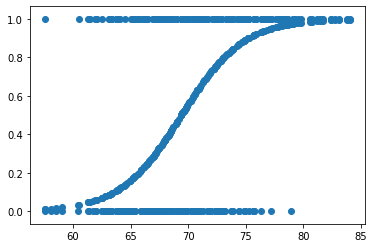

In [23]:
plt.scatter((X_train, X_train), (y_train, predict(X_train, logistic_weights)))

### Train using all data

In [20]:
l_weights=[(.25,.25,.25),(.75,.75,.75)]
learning_rate=0.0001

X_combined = np.concatenate((height, weight, female), 1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_combined, basketball, train_size=.8)

logistic_weights = run(l_weights,X_train,y_train,learning_rate)
print(f"Weights: {logistic_weights}")
print(f"Cost: {compute_cost(X_train, y_train, logistic_weights)}")

test_predictions = predict(X_test, logistic_weights) > .5
predictions_diff = test_predictions.astype(int) - y_test
unique, counts = np.unique(predictions_diff, return_counts=True)
diffs = dict(zip(unique, counts))
print(f"Accuracy: {diffs[0]}/{len(predictions_diff)} - {diffs[0]*100/len(predictions_diff)}%")

AxisError: axis 1 is out of bounds for array of dimension 1